In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors
from copy import deepcopy

%matplotlib inline

# Read data

## Rashomon

In [85]:
# fname_csv = "../Results/reff_simulations_rashomon_25_100.csv"
# fname_csv = "../Results/reff_simulations_rashomon_25_100.csv"
# fname_csv = "../Results/reff_simulations_var_1_rashomon_10_100.csv"
fname_prefix = "reff_simulations_5_"
fname_suffix = "_30_50.csv"
lasso_fname_suffix = "_30_100.csv"
rashomon_fname_csv = "../Results/" + fname_prefix + "rashomon" + fname_suffix
rashomon_raw_df = pd.read_csv(rashomon_fname_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)

# rashomon_raw_df.head()

rashomon_df = rashomon_raw_df.copy()

# compute the loss
reg = 1e-1
rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

# Find whether each model identifies the true best profile or not
true_best_profile = "(1, 0, 1)"
rashomon_df["right_best_profile"] = rashomon_df[true_best_profile]
rashomon_df["wrong_best_profile"] = 1 - rashomon_df["right_best_profile"]

# Remove all other columns
to_drop = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_diff"]
profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
                "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
rashomon_df = rashomon_df.drop(to_drop, axis=1)
# rashomon_df = rashomon_df.drop(profile_cols, axis=1)

# Sort loss grouped by n_per_pol and sim_num
rashomon_df = rashomon_df.sort_values(["n_per_pol", "sim_num", "loss"], ascending=True)

# Count models within each simulation iteration
# Check if best profile is present in the first n models
grouped_df = rashomon_df.groupby(["n_per_pol", "sim_num"]).cumsum()
rashomon_df["best_profile_present"] = (grouped_df["right_best_profile"] > 0).astype(int)
rashomon_df["model_number"] = grouped_df["right_best_profile"] + grouped_df["wrong_best_profile"]

print(len(rashomon_df))

rashomon_df.head(n=10)

799274


,n_per_pol,sim_num,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)",loss,right_best_profile,wrong_best_profile,best_profile_present,model_number
0,30,0,0,0,1,0,0,0,0,0,2.496813,0,1,0,1
158,30,0,0,0,1,0,0,0,0,0,2.529600,0,1,0,2
198,30,0,0,0,1,0,0,0,0,0,2.540016,0,1,0,3
278,30,0,0,0,1,0,0,0,0,0,2.540245,0,1,0,4
693,30,0,0,0,1,0,0,0,0,0,2.542073,0,1,0,5
7939,30,0,0,0,1,0,0,0,0,0,2.556912,0,1,0,6
773,30,0,0,0,1,0,0,0,0,0,2.574859,0,1,0,7
358,30,0,0,0,1,0,0,0,0,0,2.584418,0,1,0,8
853,30,0,0,0,1,0,0,0,0,0,2.585276,0,1,0,9
933,30,0,0,0,1,0,0,0,0,0,2.585505,0,1,0,10


In [86]:
sims_failing = pd.unique(rashomon_df[rashomon_df["best_profile_present"] == 0]["sim_num"])
never_reaching = []
for sim in sims_failing:
    if 1 not in pd.unique(rashomon_df[rashomon_df["sim_num"] == sim]["(1, 0, 1)"]):
        never_reaching.append(sim)

print(never_reaching)
# for sim in never_reaching:
#     print(rashomon_df[rashomon_df["sim_num"] == sim]["loss"])

[]


### Epsilon levels

## Lasso

In [87]:
lasso_fname_csv = "../Results/" + fname_prefix + "lasso" + lasso_fname_suffix
lasso_raw_df = pd.read_csv(lasso_fname_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)

# lasso_raw_df.head()

lasso_df = lasso_raw_df.copy()

# Find whether each model identifies the true best profile or not
true_best_profile = "(1, 0, 1)"
lasso_df["right_best_profile"] = lasso_df[true_best_profile]
lasso_df["wrong_best_profile"] = 1 - lasso_df["right_best_profile"]

# Remove all other columns
to_drop = ["MSE", "IOU", "min_dosage", "best_pol_diff"]
profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
                "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
lasso_df = lasso_df.drop(to_drop, axis=1)

# Sort loss grouped by n_per_pol and sim_num
lasso_df = lasso_df.sort_values(["n_per_pol", "sim_num", "L1_loss"], ascending=True)

# Count models within each simulation iteration
# Check if best profile is present in the first n models
grouped_df = lasso_df.groupby(["n_per_pol", "sim_num"]).cumsum()
lasso_df["best_profile_present"] = (grouped_df["right_best_profile"] > 0).astype(int)
# lasso_df["model_number"] = grouped_df["right_best_profile"] + grouped_df["wrong_best_profile"]

print(len(lasso_df))

lasso_df.head(n=10)

100


,n_per_pol,sim_num,L1_loss,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)",right_best_profile,wrong_best_profile,best_profile_present
0,30,0,2.551732,0,0,1,0,0,0,0,0,0,1,0
1,30,1,2.458530,0,0,1,0,0,0,0,0,0,1,0
2,30,2,2.556376,0,0,0,0,0,1,0,0,1,0,1
3,30,3,2.474554,0,0,1,0,0,0,0,0,0,1,0
4,30,4,2.533455,0,0,1,0,0,0,0,0,0,1,0
5,30,5,2.546334,0,0,0,0,1,0,0,0,0,1,0
6,30,6,2.493908,0,0,0,0,0,1,0,0,1,0,1
7,30,7,2.840340,0,0,1,0,0,0,0,0,0,1,0
8,30,8,2.463312,0,0,0,0,0,1,0,0,1,0,1
9,30,9,2.525701,0,0,0,0,1,0,0,0,0,1,0


## Causal Trees

In [82]:
ct_fname_csv = "../Results/" + fname_prefix + "ct" + fname_suffix
ct_raw_df = pd.read_csv(ct_fname_csv)
ct_raw_df = ct_raw_df.drop("Unnamed: 0", axis=1)

# lasso_raw_df.head()

ct_df = ct_raw_df.copy()

# Find whether each model identifies the true best profile or not
true_best_profile = "(1, 0, 1)"
ct_df["right_best_profile"] = ct_df[true_best_profile]
ct_df["wrong_best_profile"] = 1 - ct_df["right_best_profile"]

# Remove all other columns
to_drop = ["IOU", "min_dosage", "best_pol_diff"]
profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
                "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
ct_df = ct_df.drop(to_drop, axis=1)

# Sort loss grouped by n_per_pol and sim_num
ct_df = ct_df.sort_values(["n_per_pol", "sim_num", "MSE"], ascending=True)

# Count models within each simulation iteration
# Check if best profile is present in the first n models
grouped_df = ct_df.groupby(["n_per_pol", "sim_num"]).cumsum()
ct_df["best_profile_present"] = (grouped_df["right_best_profile"] > 0).astype(int)
# lasso_df["model_number"] = grouped_df["right_best_profile"] + grouped_df["wrong_best_profile"]

print(len(ct_df))

ct_df.head(n=10)

50


,n_per_pol,sim_num,MSE,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)",right_best_profile,wrong_best_profile,best_profile_present
0,30,0,0.0,0,0,1,0,0,0,0,0,0,1,0
1,30,1,0.0,0,0,0,0,0,1,0,0,1,0,1
2,30,2,0.0,0,0,0,0,0,1,0,0,1,0,1
3,30,3,0.0,0,0,0,0,0,1,0,0,1,0,1
4,30,4,0.0,0,0,0,0,0,1,0,0,1,0,1
5,30,5,0.0,0,0,0,0,0,1,0,0,1,0,1
6,30,6,0.0,0,0,0,0,0,1,0,0,1,0,1
7,30,7,0.0,0,0,0,0,0,1,0,0,1,0,1
8,30,8,0.0,0,0,0,0,0,1,0,0,1,0,1
9,30,9,0.0,0,0,0,0,0,1,0,0,1,0,1


## Bar plot

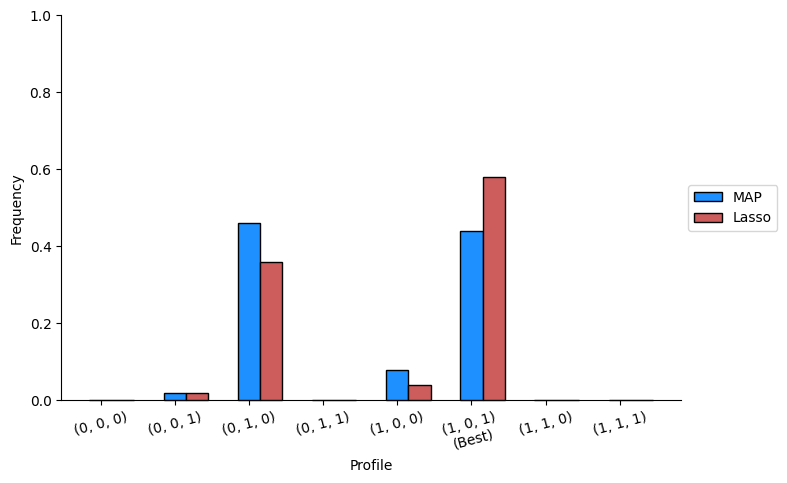

In [88]:
best_models_df = rashomon_df[rashomon_df["model_number"] == 1]

rashomon_profile_means = []
lasso_profile_means = []
ct_profile_means = []
for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    rashomon_profile_means.append(np.mean(best_models_df[profile]))
    lasso_profile_means.append(np.mean(lasso_df[profile]))
    ct_profile_means.append(np.mean(ct_df[profile]))

fig, ax = plt.subplots(figsize=(8,5))

ax.spines[['right', 'top']].set_visible(False)
profile_col_labels = deepcopy(profile_cols)
profile_col_labels[-3] = profile_cols[-3] + "\n(Best)"
ax.set_xticks(np.arange(len(profile_cols)), profile_col_labels, rotation=15)
ax.set_ylim(0, 1)

width = 0.3

ax.bar(np.arange(len(profile_cols)), rashomon_profile_means, width,
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           label="MAP"
          )

ax.bar(np.arange(len(profile_cols)) + width, lasso_profile_means, width,
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="Lasso"
          )

# ax.bar(np.arange(len(profile_cols)) - width, ct_profile_means, width,
#            color="forestgreen", edgecolor="black", zorder=3, clip_on=False,
#            label="Causal Trees"
#           )

ax.set_xlabel("Profile")
ax.set_ylabel("Frequency")
# ax.set_title("Best model")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [95]:
print("Rashomon\t", rashomon_profile_means)
print("Lasso\t\t", lasso_profile_means)

Rashomon	 [0.0, 0.02, 0.46, 0.0, 0.08, 0.44, 0.0, 0.0]
Lasso		 [0.0, 0.02, 0.36, 0.0, 0.04, 0.58, 0.0, 0.0]


## Epsilon plot

In [111]:
eps_df = rashomon_df.copy()

eps_df = eps_df.drop(profile_cols, axis=1)

eps_df["eps"] = eps_df.groupby(["n_per_pol", "sim_num"])["loss"].transform(lambda x: (x - x.min()) / x.min() * 100)

# eps_levels = [-0.1, 0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6]
# eps_levels = [-0.1, 0, 3, 5, 7, 9, 11]
# eps_levels = [-0.1, 0, 5.2, 5.4, 5.6, 5.8, 6, 11, 12]

eps_hist = np.histogram(eps_df["eps"], bins=15)[1].tolist()
eps_levels = [-0.1] + eps_hist + [np.max(eps_df["eps"]) + 0.1]
# eps_levels = [-0.1 + np.min(eps_hist)] + eps_hist + [np.max(eps_hist) + 0.1]
eps_bins = eps_levels[1:]
eps_df["eps_levels"] = pd.cut(eps_df["eps"], bins=eps_levels, labels=eps_bins)

eps_df.head()

,n_per_pol,sim_num,loss,right_best_profile,wrong_best_profile,best_profile_present,model_number,eps,eps_levels
0,30,0,2.496813,0,1,0,1,0.000000,0.000000
158,30,0,2.529600,0,1,0,2,1.313140,1.361540
198,30,0,2.540016,0,1,0,3,1.730332,2.723081
278,30,0,2.540245,0,1,0,4,1.739514,2.723081
693,30,0,2.542073,0,1,0,5,1.812697,2.723081


In [112]:
print(np.histogram(rashomon_df["loss"])[1].tolist())
print(eps_levels)
print("\n\n")
print("eps:", np.min(eps_df.groupby(["n_per_pol", "sim_num"])["eps"].transform("max")))

for sim in never_reaching:
    print(sim, np.max(eps_df[eps_df["sim_num"] == sim]["eps"]))

[2.408173999839174, 2.457356597233305, 2.506539194627436, 2.555721792021567, 2.6049043894156982, 2.65408698680983, 2.7032695842039605, 2.752452181598092, 2.801634778992223, 2.8508173763863542, 2.8999999737804854]
[-0.1, 0.0, 1.3615403390902032, 2.7230806781804064, 4.08462101727061, 5.446161356360813, 6.807701695451016, 8.16924203454122, 9.530782373631423, 10.892322712721626, 12.253863051811829, 13.615403390902031, 14.976943729992236, 16.33848406908244, 17.70002440817264, 19.061564747262846, 20.423105086353047, 20.52310508635305]



eps: 12.142091184487759


In [113]:
eps_df["best_prof_max"] = eps_df.groupby(["n_per_pol", "sim_num", "eps_levels"], observed=False)["best_profile_present"].transform("max")

eps_df = eps_df.drop_duplicates(["n_per_pol", "sim_num", "eps_levels", "best_prof_max"])

# eps_df["profile_rate_eps"] = eps_df.groupby(
#     ["n_per_pol", "eps_levels"], observed=False)["best_profile_present"].transform("mean")

eps_df["profile_rate_eps"] = eps_df.groupby(
    ["n_per_pol", "eps_levels"], observed=False)["best_prof_max"].transform("mean")

eps_df = eps_df.drop_duplicates(["n_per_pol", "eps_levels"])
eps_df = eps_df.drop(["sim_num", "loss", "right_best_profile", "wrong_best_profile", "best_profile_present"], axis=1)

eps_df = eps_df.sort_values("eps_levels")

eps_df

,n_per_pol,model_number,eps,eps_levels,best_prof_max,profile_rate_eps
0,30,1,0.000000,0.000000,0,0.440000
158,30,2,1.313140,1.361540,0,0.625000
198,30,3,1.730332,2.723081,0,0.700000
773,30,7,3.125837,4.084621,0,0.700000
8099,30,30,4.137344,5.446161,0,0.720000
1053,30,54,5.487079,6.807702,1,0.820000
8972,30,141,6.813619,8.169242,1,0.840000
13622,30,417,8.174102,9.530782,1,0.940000
12498,30,669,9.535302,10.892323,1,0.960000
12546,30,1445,10.921625,12.253863,1,0.980000


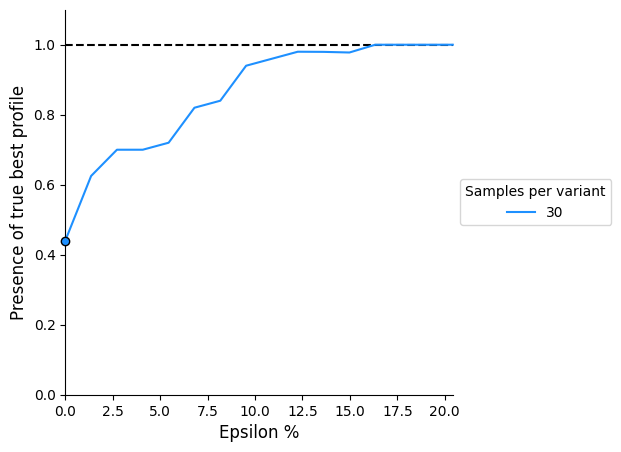

In [114]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

# sizes = [5, 10, 25, 50, 100, 250, 500, 1000]
sizes = [25]
n = 30
colors = ["dodgerblue", "indianred", "green", "orange", "orchid", "mediumseagreen", "slateblue", "slategray"]

len_x = 10
x_horizontal = np.linspace(0, np.max(eps_df["eps_levels"]), num=len_x)
y_best = np.array([1] * len_x)
# y_baseline = np.array([1/8] * len_x)
ax.plot(x_horizontal, y_best, color="black", ls="--")
# ax.plot(x_horizontal, x_horizontal / 2**24, color="grey", ls="--")

# for idx, n in enumerate(sizes):
#     n_subset = eps_df[eps_df["n_per_pol"] == n]
    
ax.plot(eps_df["eps_levels"], eps_df["profile_rate_eps"],
        color=colors[0], zorder=3.1, clip_on=False,
        label=f"{n}")
ax.scatter(eps_df["eps_levels"].iloc[0], eps_df["profile_rate_eps"].iloc[0],
           color=colors[0], edgecolor="black",
           zorder=3.1, clip_on=False)

# ax.set_xscale("log")
ax.set_xlabel("Epsilon %", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_xlim(0, np.max(eps_df["eps_levels"]))
ax.set_ylabel("Presence of true best profile", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Samples per variant")

# plt.savefig("../Figures/sim_4/true_best_prof.png", dpi=300, bbox_inches="tight")
plt.show()